In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [133]:
data=pd.read_csv("data_p.csv")

In [134]:
data.head()

,Unnamed: 0,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,orderdate_day,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_weekday,shipdate_month,shipdate_year,preparationtime
0,1,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,Bookcases ...,Furniture,4,Sonntag,9,2016,6,Dienstag,9,2016,2
1,2,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,5,Freitag,9,2014,9,Dienstag,9,2014,4
2,3,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,Bookcases ...,Furniture,28,Donnerstag,11,2013,28,Donnerstag,11,2013,0
3,4,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,30,Montag,5,2016,31,Dienstag,5,2016,1
4,5,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,31,Dienstag,12,2013,7,Dienstag,1,2014,7


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9994 non-null   int64  
 1   shipmode           9994 non-null   object 
 2   sales              9994 non-null   float64
 3   quantity           9994 non-null   int64  
 4   discount           9994 non-null   float64
 5   profit             9994 non-null   float64
 6   segment            9994 non-null   object 
 7   region             9994 non-null   object 
 8   state              9994 non-null   object 
 9   subcategory        9994 non-null   object 
 10  category           9994 non-null   object 
 11  orderdate_day      9994 non-null   int64  
 12  orderdate_weekday  9994 non-null   object 
 13  orderdate_month    9994 non-null   int64  
 14  orderdate_year     9994 non-null   int64  
 15  shipdate_day       9994 non-null   int64  
 16  shipdate_weekday   9994 

In [136]:
data.columns


Index(['Unnamed: 0', 'shipmode', 'sales', 'quantity', 'discount', 'profit',
       'segment', 'region', 'state', 'subcategory', 'category',
       'orderdate_day', 'orderdate_weekday', 'orderdate_month',
       'orderdate_year', 'shipdate_day', 'shipdate_weekday', 'shipdate_month',
       'shipdate_year', 'preparationtime'],
      dtype='object')

In [137]:
data=data[[ 'quantity', 'discount', 'profit',
        'orderdate_month', 'shipdate_month',
       'preparationtime','sales']]

In [8]:
data.head()

,quantity,discount,profit,orderdate_month,shipdate_month,preparationtime,sales
0,9,0.30,-117.8820,9,9,2,825.174
1,4,0.15,-4.8392,9,9,4,411.332
2,4,0.15,-4.8392,11,11,0,411.332
3,2,0.00,33.8744,5,5,1,241.960
4,2,0.00,78.6508,12,1,7,341.960


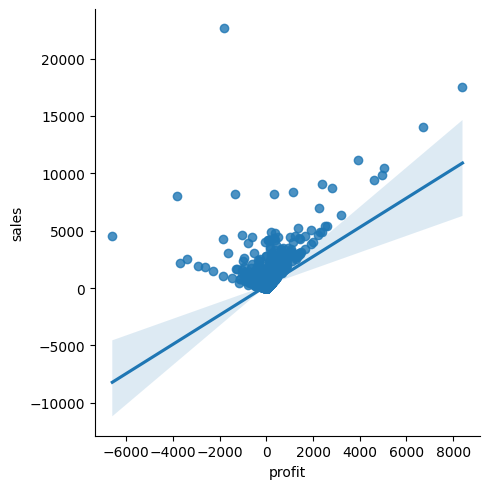

In [11]:
sns.lmplot(x="profit",y="sales",data=data)

In [116]:
X=data.drop("sales",axis=1)

In [117]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [118]:
print(X)

      quantity  discount    profit  orderdate_month  shipdate_month  \
0            9      0.30 -117.8820                9               9   
1            4      0.15   -4.8392                9               9   
2            4      0.15   -4.8392               11              11   
3            2      0.00   33.8744                5               5   
4            2      0.00   78.6508               12               1   
...        ...       ...       ...              ...             ...   
9989         7      0.20  123.4737               12              12   
9990         5      0.00  284.1855               12              12   
9991         2      0.40  -43.1178                1               1   
9992         2      0.00  113.6742                9               9   
9993         2      0.00  113.6742                1               1   

      preparationtime  
0                   2  
1                   4  
2                   0  
3                   1  
4                   7  
...

In [119]:
y=data["sales"]

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [150]:
scaler = MinMaxScaler()

In [151]:
X_train=scaler.fit_transform(X_train)

In [152]:
X_test=scaler.fit_transform(X_test)

In [153]:
model = LinearRegression()

In [154]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [155]:
y_pred = model.predict(X_test)

In [156]:
coef=pd.DataFrame(model.coef_,X.columns)
coef.columns=["COEFFICIENTS"]
coef

,COEFFICIENTS
quantity,590.514724
discount,192.754151
profit,20087.288568
orderdate_month,-35.101023
shipdate_month,34.094785
preparationtime,-13.982061


In [157]:
mse=mt.mean_squared_error(y_test,y_pred)
mae=mt.mean_absolute_error(y_test,y_pred)

In [158]:
print("Mean Squared error:",np.sqrt(mse))
print("Mean Absolute error:",mae)


Mean Squared error: 3249.99452855606
Mean Absolute error: 3223.260172469557


In [159]:
print("min percentage error:",((np.sqrt(mse)*100)/data["sales"].max()).round(2))

min percentage error: 14.36


In [160]:
print("max percentage error:",((np.sqrt(mse)*100)/data["sales"].min()).round(2))

max percentage error: 731980.75
